# 2D EPA implementation

This example provides basic idea to invoke module from pypsc and execute them to solve a given structure in two-dimensional (2D) parameter space (PS) within EPA framework<br><br>


> - <span style="color:cyan">EPA framework is applied</span>
> - <span style="color:cyan">Both double- nad single-segment approaches are provided</span><br><br>

In the following cells, the user can play with the structure parameter ***xcoor*** and reflection parameter ***h*** to simulate different structures.<br>
The reflection parameter ***h*** can be changed to any desired values but must be <mark>>=2</mark>. All other setting are to be left unchanged.<br><br>

<mark>NOTE: This example is only for two-dimensional structures *i.e.* **xcoor** should be of form **np.array([z1, z2])**.</mark><br><br>


Link to cells:

> 1. [2D EPA: Double-segments (DS)](#ds)
> 2. [2D EPA: Single-segments (SS)](#ss)

## <font color='blue'> Load nescesssary modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib widget

import os
import numpy as np
import matplotlib.pyplot as plt


from psc.lib.g_space import g, hsurf_g
from psc.lib.x2Dlinearization import double_segment_EPA, single_segment_EPA 
from psc.lib.x2Dpolygon import getploygons_EPA_SS, getploygons_EPA_DS, polyintersect, polyintersect_MC
from psc.lib.x2Drepetition import linrep_DS, linrep_SS, writedata
from psc.lib.x3Drepetition import getmesh
from psc.tools.x2Dplot import plot_segment, plotisosurf_EPA
from psc.lib.x2Dwritesolution import analyzesolution

## <a id="ds"></a><font color='blue'>2D EPA: Double-segments (DS)

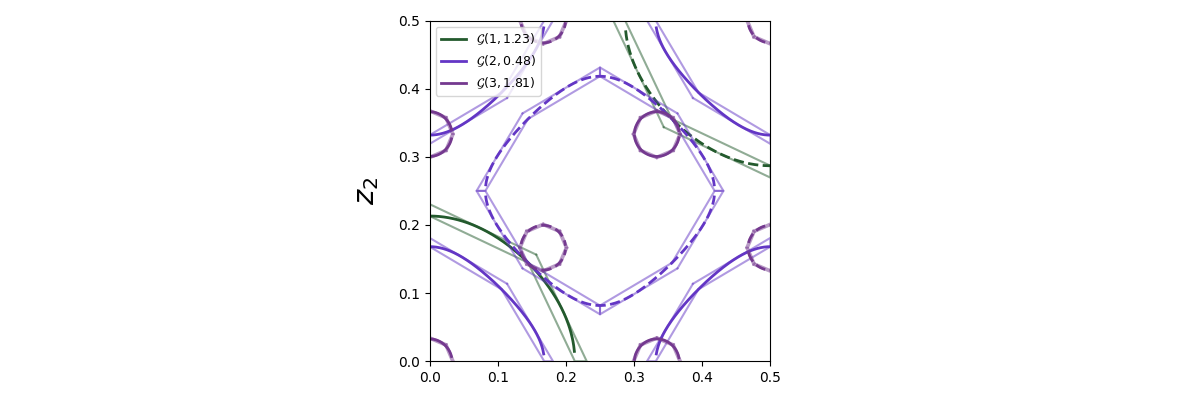

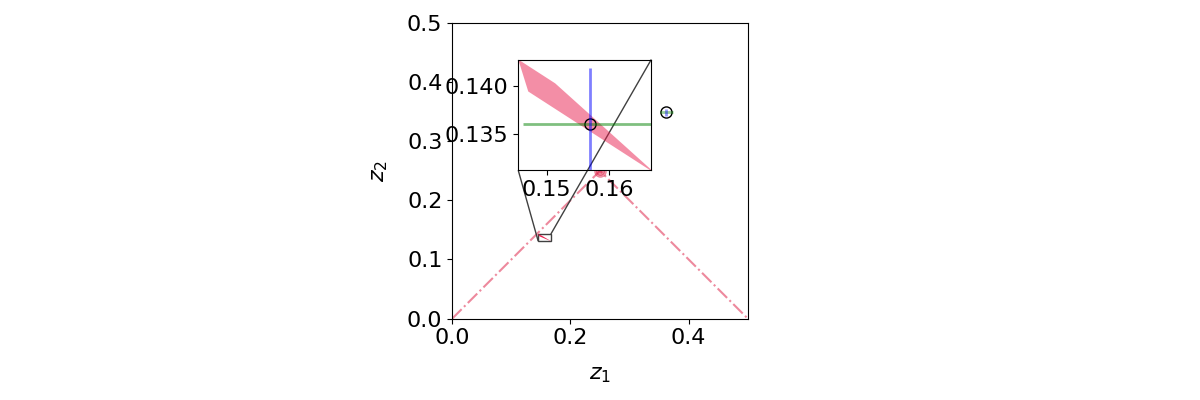

===> Possible solution (centorid of polygon) :: [0.15364 0.13775] or [0.34636 0.36225]
===> Assumed coordinate: [0.362 0.349]
===> Possible uncertainty in solution :: (np.float64(-0.010686850481930063), np.float64(-0.005873478390791692))
===> Finals area                      :: 3.5697497270902645e-05



In [2]:

### define random strucutre
xcoor  = [0.349, 0.362]

### assume we solve for second atomic corrdinate 
j     = 1

### defining number of reflection orders to consider
h     = 3
hss   = np.arange(1,h+1)

### generating possible atomic corrdinates in 2D PS. hence grid has dimension of 2x500. 
isos = np.linspace(0., (0.5)/1, 500)  # !!! to change the precision in isosurface change 500 to higher number
grid = [isos]*len(xcoor)

### define plot container
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,4), subplot_kw = dict(aspect = 1.0))
fig.tight_layout()
ax.set_xlim(isos.min(), isos.max()) ; ax.set_ylim(isos.min(), isos.max())
ax.set_xlabel(r'$z_1$' ,fontsize=21,labelpad=12) ; ax.set_ylabel(r'$z_2$' ,fontsize=21,labelpad=12)
plt.rc('xtick', labelsize=16) ; plt.rc('ytick', labelsize=16)

### open a dat file to store data
fn=open("xpnts_%g.dat"%(h), "wt+")  

### staring amplitude calculation for each RO h and plot them
for ic, l in enumerate(hss):
    xcoor  = np.sort(xcoor)[::-1]
    
    # EPA model
    f     = [1, 1]
    
    # calculate amplitude for given strucutre and RO
    gi    = np.abs(g(l, xcoor, f))
    
    # calculate the isosurface over entrie PS using above gi for s=+1 and s=-1
    giso1 = hsurf_g(l, grid, f, gi, j, s=1)
    giso2 = hsurf_g(l, grid, f, gi, j, s=-1)

    # plot calculated isosurfcae. define cc='k' if same is wanted. or isosurface colour will change automatically
    r = np.random.uniform(0.0, 0.8, 3) ; cc = (r[0],r[1],r[2],1)
    plotisosurf_EPA(l, h, gi, ax, isos, giso1, giso2, cc, lw=2, imax=0.5)
    
    #---> inearization process with error of err 
    errr = 0
    meshlist = getmesh(l, xcoor, isos.max())

    #---> double segment method - EPA
    pnts = double_segment_EPA(gi, l, f, error=0)
    plist=linrep_DS(l, f, pnts, meshlist, imin=0, imax=0.5)

    #---> single segment method - EPA
    #pnts = single_segment_EPA(gi, l, xexp, f, error=0)
    #plist=linrep_SS(l, f, pnts, meshlist, imin=0, imax=0.5)

    #---> plot segments
    plot_segment(ax, plist, cc)

    #---> storing segment data
    writedata(fn, plist)

fn.close()

plt.legend(loc=2, prop={'size': 9})#, bbox_to_anchor=(1.0, 1.020))
plt.show()


# ---> Post processing to get the given atomic coordinates

# ---> Reading corner points of polygons of given ROs
pointlst = np.loadtxt(os.path.join(os.getcwd(),'xpnts_%g.dat'%(h)),delimiter='\t')

# ---> Getting polygons of given ROs
poly = getploygons_EPA_DS(h, pointlst, imax=0.5)

# ---> Finding solution via intersection of polygons of given ROs
with open ('info.dat', "at+") as finfo:
    solution = polyintersect_MC(h, poly, xcoor, finfo, count=0 )

# ---> Writting found solutions from given ROs
analyzesolution(solution, xcoor, plotting=True)

## <a id="ss"></a><font color='blue'> 2D EPA: Single-segments (SS)

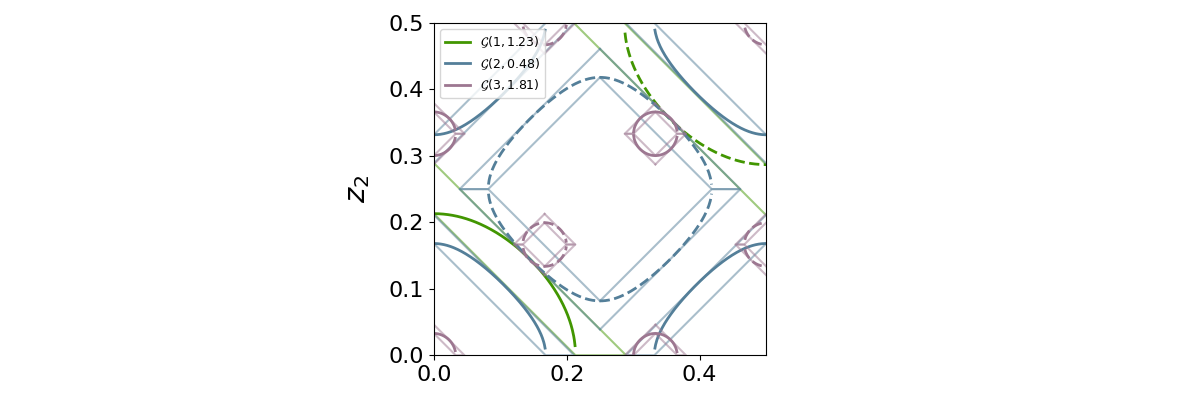

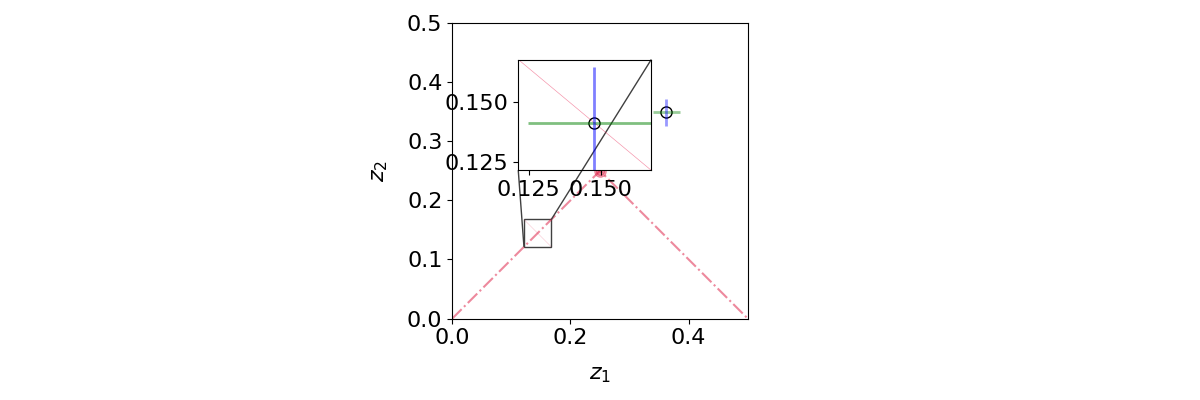

===> Possible solution (centorid of polygon) :: [0.14452 0.14452] or [0.35548 0.35548]
===> Assumed coordinate: [0.362 0.349]
===> Possible uncertainty in solution :: (np.float64(-0.02313102460156486), np.float64(-0.02313102460156486))
===> Finals area                      :: 1.566483117376022e-05



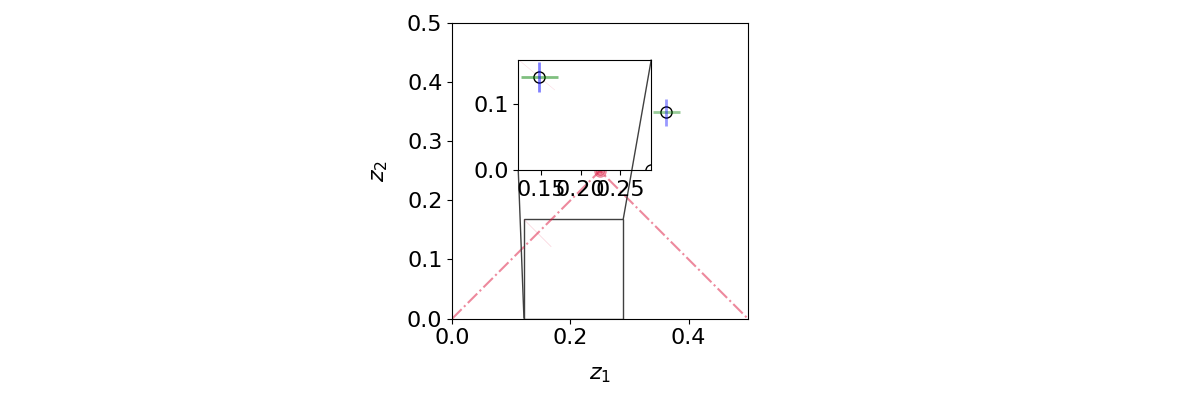

===> Possible solution (centorid of polygon) :: [0.28904 0.00006] or [0.21096 0.49994]
===> Assumed coordinate: [0.362 0.349]
===> Possible uncertainty in solution :: (np.float64(-0.0001699250000000152), np.float64(-8.496250293778052e-05))
===> Finals area                      :: 2.8874506623407296e-08



In [3]:

### define random strucutre
xcoor  = [0.349, 0.362]

### assume we solve for second atomic corrdinate 
j     = 1

### defining number of reflection orders to consider
h     = 3
hss   = np.arange(1,h+1)

### generating possible atomic corrdinates in 2D PS. hence grid has dimension of 2x500. 
isos = np.linspace(0., (0.5)/1, 500)  # !!! to change the precision in isosurface change 500 to higher number
grid = [isos]*len(xcoor)

### define plot container
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (12,4), subplot_kw = dict(aspect = 1.0))
fig.tight_layout()
ax.set_xlim(isos.min(), isos.max()) ; ax.set_ylim(isos.min(), isos.max())
ax.set_xlabel(r'$z_1$' ,fontsize=21,labelpad=12) ; ax.set_ylabel(r'$z_2$' ,fontsize=21,labelpad=12)
plt.rc('xtick', labelsize=16) ; plt.rc('ytick', labelsize=16)

### open a dat file to store data
fn=open("xpnts_%g.dat"%(h), "wt+")  

### staring amplitude calculation for each RO h and plot them
for ic, l in enumerate(hss):
    xcoor  = np.sort(xcoor)[::-1]
    
    # EPA model
    f     = [1, 1]
    
    # calculate amplitude for given strucutre and RO
    gi    = np.abs(g(l, xcoor, f))
    
    # calculate the isosurface over entrie PS using above gi for s=+1 and s=-1
    giso1 = hsurf_g(l, grid, f, gi, j, s=1)
    giso2 = hsurf_g(l, grid, f, gi, j, s=-1)

    # plot calculated isosurfcae. define cc='k' if same is wanted. or isosurface colour will change automatically
    r = np.random.uniform(0.0, 0.8, 3) ; cc = (r[0],r[1],r[2],1)
    plotisosurf_EPA(l, h, gi, ax, isos, giso1, giso2, cc, lw=2, imax=0.5)
    
    #---> inearization process with error of err 
    errr = 0
    meshlist = getmesh(l, xcoor, isos.max())

    #---> double segment method - EPA
    #pnts = double_segment_EPA(gi, l, xcoor, f, error=0)
    #plist=linrep_DS(l, f, pnts, meshlist, imin=0, imax=0.5)

    #---> single segment method - EPA
    pnts = single_segment_EPA(gi, l, f, error=0)
    plist=linrep_SS(l, f, pnts, meshlist, imin=0, imax=0.5)

    #---> plot segments
    plot_segment(ax, plist, cc)

    #---> storing segment data
    writedata(fn, plist)

fn.close()

plt.legend(loc=2, prop={'size': 9})#, bbox_to_anchor=(1.0, 1.020))
plt.show()


# ---> Post processing to get the given atomic coordinates


# ---> Reading corner points of polygons of given ROs
pointlst = np.loadtxt(os.path.join(os.getcwd(),'xpnts_%g.dat'%(h)),delimiter='\t')

# ---> Getting polygons of given ROs
poly = getploygons_EPA_SS(h, pointlst, imax=0.5)

# ---> Finding solution via intersection of polygons of given ROs
with open ('info.dat', "at+") as finfo:
    solution = polyintersect_MC(h, poly, xcoor, finfo, count=0 )

# ---> Writting found solutions from given ROs
analyzesolution(solution, xcoor, plotting=True)